# Dataset visualization

In [2]:
import stanscofi.datasets
import stanscofi.utils
import stanscofi.training_testing

from importlib import reload
import sys
sys.path.insert(0,"../src/")

rseed=12345

dataset_folder="../datasets/"
! mkdir -p "../datasets/"
! pip install -q stanscofi==2.0.0
! pip freeze | grep "stanscofi"

stanscofi==2.0.0


## TRANSCRIPT dataset

### PCA

Plot PCA


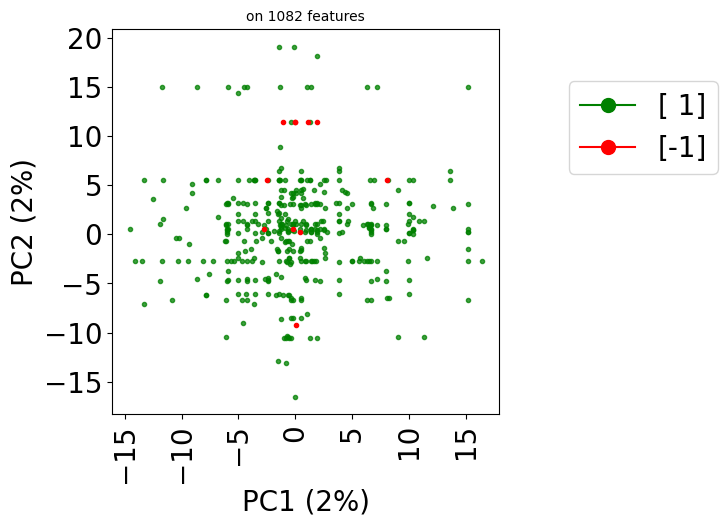

In [3]:
dataset_name="TRANSCRIPT" 
data_args = stanscofi.utils.load_dataset(dataset_name, dataset_folder)
data_args.update({"same_item_user_features": (dataset_name=="TRANSCRIPT")})
real_dataset = stanscofi.datasets.Dataset(**data_args)

print("Plot PCA")
real_dataset.visualize(withzeros=False)

### UMAP

Plot UMAP


/home/kali/miniconda3/envs/stanscofi_env/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/kali/miniconda3/envs/stanscofi_env/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/kali/miniconda3/envs/stanscofi_env/lib/python3.8/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/kali/miniconda3/envs/stanscofi_env

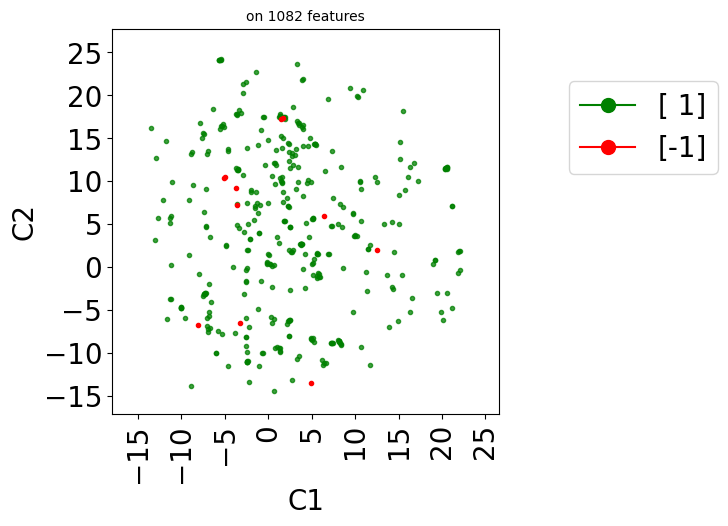

In [4]:
print("Plot UMAP")
real_dataset.visualize(withzeros=False, dimred_args={'n_neighbors': 10})

### t-SNE

In [ ]:
from sklearn.manifold import TSNE
from stanscofi.preprocessing import meanimputation_standardize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

print("Plot (Barnes-Hut) t-SNE")

nvalues = real_dataset.folds.data.shape[0]
subselect_size = max(2,min(int(5e7)//nvalues+1, nvalues))
subselect_size = min(subselect_size, min(real_dataset.users.shape[0],real_dataset.items.shape[0]))
## Preprocessed (item, user) pair feature matrix and corresponding outcome vector
X, y, _, _ = meanimputation_standardize(real_dataset, subset=subselect_size, inf=2, verbose=False)
markers = np.column_stack((real_dataset.folds.row, real_dataset.folds.col))
markers = np.concatenate((markers, y.reshape(-1,1)), axis=1)
all_pairs = np.array([[{-1:"r.", 1:"g.", 0:"y."}[k]] for i,j,k in markers.tolist()])
all_pairs = np.concatenate((markers, all_pairs), axis=1)
all_pairs[:,:-1] = all_pairs[:,:-1].astype(float).astype(int)

In [ ]:
model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', n_iter=1000, 
     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, 
     init='pca', verbose=0, random_state=1234, method='barnes_hut', angle=0.5, n_jobs=5)
dimred_X = model.fit_transform(X)

In [ ]:
import matplotlib.lines as mlines

## Put points in the front layer
layer = {"g.": 1, "r.": 1, "y.": 0}
## More visible points
alpha = {"g.": 0.75, "r.": 1, "y.": 0.1}
fontsize=20
plt.figure(figsize=(5,5))
for mkr in np.unique(np.ravel(all_pairs[:,3])).tolist():
    all_pairs_k = np.argwhere(all_pairs[:,3]==mkr)[:,0].tolist()
    if (mkr=="y."):
        plt.scatter(dimred_X[all_pairs_k,0], dimred_X[all_pairs_k,1], c="w", marker=".", zorder=0, alpha=0)
    else:
        plt.scatter(dimred_X[all_pairs_k,0], dimred_X[all_pairs_k,1], c=mkr[0], marker=mkr[1], zorder=layer[mkr], 
                    alpha=alpha[mkr])
handles = [mlines.Line2D([], [], color={'r':'red','g':'green','y':'yellow'}[k[0]], 
            label={'r':'[-1]','y':'[ 0]','g':"[ 1]"}[k[0]], marker='.', markersize=fontsize,
    ) for k in np.unique(np.asarray(all_pairs[:,-1], dtype=str)).tolist() if (k[0]!="y")]
plt.xticks(fontsize=fontsize, rotation=90)
plt.yticks(fontsize=fontsize)
plt.ylabel("t-SNE C2", fontsize=fontsize)
plt.xlabel("t-SNE C1", fontsize=fontsize)
plt.title("on %d features" % X.shape[1], fontsize=fontsize//2)
plt.legend(handles=handles, fontsize=fontsize, loc='upper right', bbox_to_anchor=(1.6,0.9))
plt.show()

## PREDICT dataset

### PCA

In [ ]:
dataset_name="PREDICT"
data_args = stanscofi.utils.load_dataset(dataset_name, dataset_folder)
data_args.update({"same_item_user_features": (dataset_name=="TRANSCRIPT")})
real_dataset = stanscofi.datasets.Dataset(**data_args)

print("Plot PCA")
real_dataset.visualize(withzeros=False)

### UMAP

In [ ]:
print("Plot UMAP")
real_dataset.visualize(withzeros=False, dimred_args={'n_neighbors': 10})

### t-SNE

In [ ]:
print("Plot (Barnes-Hut) t-SNE")

nvalues = real_dataset.folds.data.shape[0]
subselect_size = max(2,min(int(5e7)//nvalues+1, nvalues))
subselect_size = min(subselect_size, min(real_dataset.users.shape[0],real_dataset.items.shape[0]))
## Preprocessed (item, user) pair feature matrix and corresponding outcome vector
X, y, _, _ = meanimputation_standardize(real_dataset, subset=subselect_size, inf=2, verbose=False)
markers = np.column_stack((real_dataset.folds.row, real_dataset.folds.col))
markers = np.concatenate((markers, y.reshape(-1,1)), axis=1)
all_pairs = np.array([[{-1:"r.", 1:"g.", 0:"y."}[k]] for i,j,k in markers.tolist()])
all_pairs = np.concatenate((markers, all_pairs), axis=1)
all_pairs[:,:-1] = all_pairs[:,:-1].astype(float).astype(int)
            
model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate='auto', n_iter=1000, 
     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', metric_params=None, 
     init='pca', verbose=0, random_state=1234, method='barnes_hut', angle=0.5, n_jobs=5)
dimred_X = model.fit_transform(X)

## Put points in the front layer
layer = {"g.": 1, "r.": 1, "y.": 0}
## More visible points
alpha = {"g.": 0.75, "r.": 1, "y.": 0.1}
fontsize=20
plt.figure(figsize=(5,5))
for mkr in np.unique(np.ravel(all_pairs[:,3])).tolist():
    all_pairs_k = np.argwhere(all_pairs[:,3]==mkr)[:,0].tolist()
    if (mkr=="y."):
        plt.scatter(dimred_X[all_pairs_k,0], dimred_X[all_pairs_k,1], c="w", marker=".", zorder=0, alpha=0)
    else:
        plt.scatter(dimred_X[all_pairs_k,0], dimred_X[all_pairs_k,1], c=mkr[0], marker=mkr[1], zorder=layer[mkr], 
                    alpha=alpha[mkr])
handles = [mlines.Line2D([], [], color={'r':'red','g':'green','y':'yellow'}[k[0]], 
            label={'r':'[-1]','y':'[ 0]','g':"[ 1]"}[k[0]], marker='.', markersize=fontsize,
    ) for k in np.unique(np.asarray(all_pairs[:,-1], dtype=str)).tolist() if (k[0]!="y")]
plt.xticks(fontsize=fontsize, rotation=90)
plt.yticks(fontsize=fontsize)
plt.ylabel("t-SNE C2", fontsize=fontsize)
plt.xlabel("t-SNE C1", fontsize=fontsize)
plt.title("on %d features" % X.shape[1], fontsize=fontsize//2)
plt.legend(handles=handles, fontsize=fontsize, loc='upper right', bbox_to_anchor=(1.6,0.9))
plt.show()